# Prediction of Product Sales

Author: Nian Vrey

##Project Overview

Predicting sales of various products to understand the properties of products and outlets that play crucial roles in increasing sales. This project is done as part of the Data Science Course by Umuzi.

## Load and Inspect Data


### Data Dictionary for sales_predictions_2023.csv

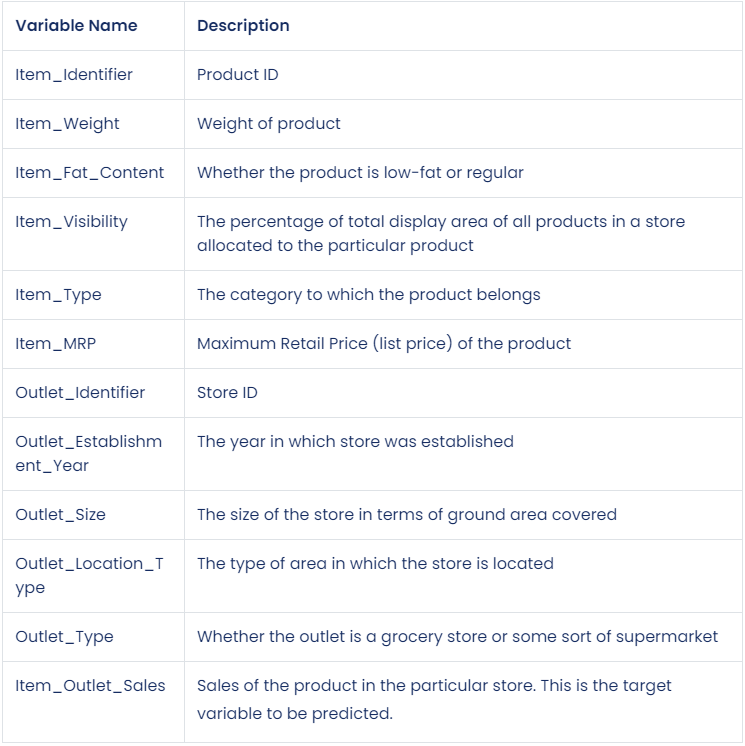

### Data Setup
Importing libraries, then creating and checking the DataFrame

In [102]:
# Imports
import pandas as pd
import numpy as np
from missingno import matrix
import seaborn as sns
from matplotlib import pyplot as plt

## Modeling & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output='pandas')

In [3]:
# Read initial csv into DataFrame
initial_data_filepath = 'https://raw.githubusercontent.com/YoungVoid/Prediction-of-Product-Sales/main/sales_predictions_2023.csv'

df_sales_predictions = pd.read_csv(initial_data_filepath)

In [4]:
# Check DataFrame Info - 8523 entries, 12 Columns
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# First 5 Rows
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_sales_predictions.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3   

## Clean Data

Checks -


1.   Check Data Types - all dtypes from .info() seems correct
2.   Check Duplicates - .duplicated().sum() returns 0 duplicated rows
3.   Check Unique Values - No columns have 100% Unique Values
4.   Check Missing Values - Columns Item_Weight(1463) and Outlet_Size(2410). Placeholders Inserted.
5.   Inconsistencies - Found and Fixed


In [7]:
# Check how many duplicated rows there are
df_sales_predictions.duplicated().sum()

0

In [8]:
# Check Unique Values %
unique_counts = df_sales_predictions.nunique()
unique_counts / len(df_sales_predictions) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [9]:
# Check Missing Values
df_sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Address Item_Weight Missing Values

In [10]:
# Check Values
df_sales_predictions['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
# Check Missing Count Before Fix
df_sales_predictions['Item_Weight'].isna().sum()

1463

In [12]:
# Insert Placeholder Values -> -1
df_sales_predictions['Item_Weight'] = df_sales_predictions['Item_Weight'].fillna(-1)

In [13]:
# Check Missing Count After Fix
df_sales_predictions['Item_Weight'].isna().sum()

0

### Address Outlet_Size Missing Values

In [14]:
# Check Values
df_sales_predictions['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
# Check Missing Count Before Fix
df_sales_predictions['Outlet_Size'].isna().sum()

2410

In [16]:
# Insert Placeholder Values -> MISSING
df_sales_predictions['Outlet_Size'] = df_sales_predictions['Outlet_Size'].fillna('MISSING')

In [17]:
# Check Missing Count After Fix
df_sales_predictions['Outlet_Size'].isna().sum()

0

In [18]:
# Confirm that there are no more missing values via pandas sum
df_sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

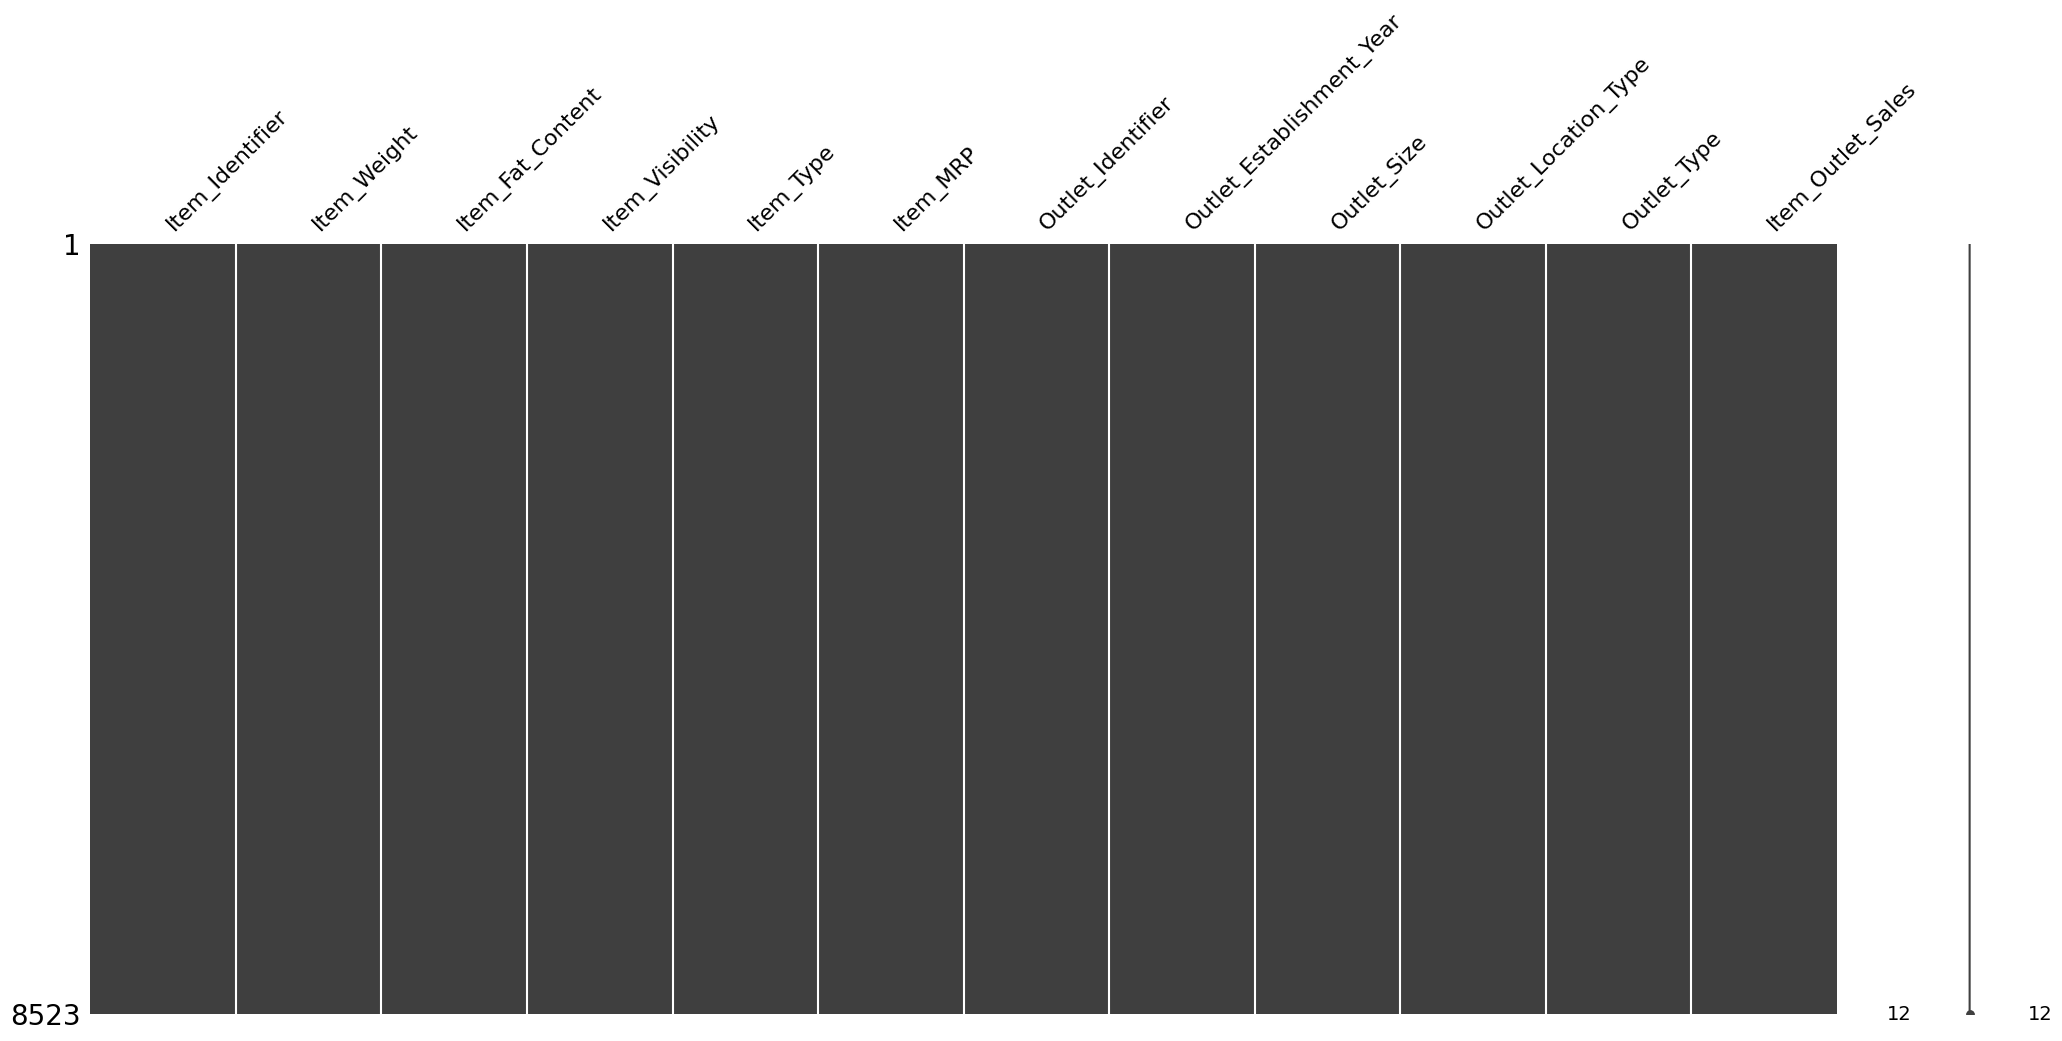

In [19]:
# Confirm that there are no more missing values via missingno.matrix
matrix(df_sales_predictions)

### Checking and Fixing Inconsistent Values

Problems Found:

Item_Fat_Content

*   'LF' to become 'Low Fat'
*   'low fat' to become 'Low Fat'
*   'reg' to become 'Regular'




In [20]:
categorical_columns = df_sales_predictions.select_dtypes('object').columns
df_sales_predictions[categorical_columns]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,MISSING,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [21]:
# Check every categorical column for potential inconsistent data
for catcol in categorical_columns:
  print(f'*** {catcol} ***')
  print(df_sales_predictions[catcol].value_counts(),'\n')

*** Item_Identifier ***
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

*** Item_Fat_Content ***
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

*** Item_Type ***
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

*** Outlet_Identifier ***
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018  

In [22]:
# Check Inconsistent Data Counts Before Fix
df_sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
# Fix Inconsistent Data
df_sales_predictions['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)

In [24]:
# Check Inconsistent Data Counts After Fix
df_sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Exploratory Data Analysis

### DataFrame Stats

In [25]:
numeric_columns = df_sales_predictions.select_dtypes('number').columns

In [26]:
df_sales_predictions[numeric_columns]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [27]:
# Loop through every numeric column and give the min, max and mean.
# If the column is 'Item_Weight', then we need to account for the -1 Placeholders
# we added. A Filter has been created and applied in that scenario. The filter
# doesn't need to be applied for the other columns, so we leave them as is
for numcol in numeric_columns:
  if numcol == 'Item_Weight':
    filter_Placeholders = df_sales_predictions[numcol] == -1
    df = df_sales_predictions.loc[~filter_Placeholders]
  else:
    df = df_sales_predictions
  print(f'*** {numcol} *** ')
  print(f'Min: {df[numcol].min()}')
  print(f'Max: {df[numcol].max()}')
  print(f'Mean: {df[numcol].mean()}','\n')

*** Item_Weight *** 
Min: 4.555
Max: 21.35
Mean: 12.857645184135977 

*** Item_Visibility *** 
Min: 0.0
Max: 0.328390948
Mean: 0.06613202877895108 

*** Item_MRP *** 
Min: 31.29
Max: 266.8884
Mean: 140.9927819781767 

*** Outlet_Establishment_Year *** 
Min: 1985
Max: 2009
Mean: 1997.8318667135984 

*** Item_Outlet_Sales *** 
Min: 33.29
Max: 13086.9648
Mean: 2181.288913575032 



In [28]:
# Alternative way of doing the above, using .describe() to get even more stats.
for numcol in numeric_columns:
  if numcol == 'Item_Weight':
    filter_Placeholders = df_sales_predictions[numcol] == -1
    df = df_sales_predictions.loc[~filter_Placeholders]
  else:
    df = df_sales_predictions
  print(f'*** {numcol} *** ')
  print(df[numcol].describe(),'\n')

*** Item_Weight *** 
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64 

*** Item_Visibility *** 
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64 

*** Item_MRP *** 
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64 

*** Outlet_Establishment_Year *** 
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64 

*** Item_Outlet_Sales *** 
count     8523.000000
mean      2181.288914

### Data Visualization

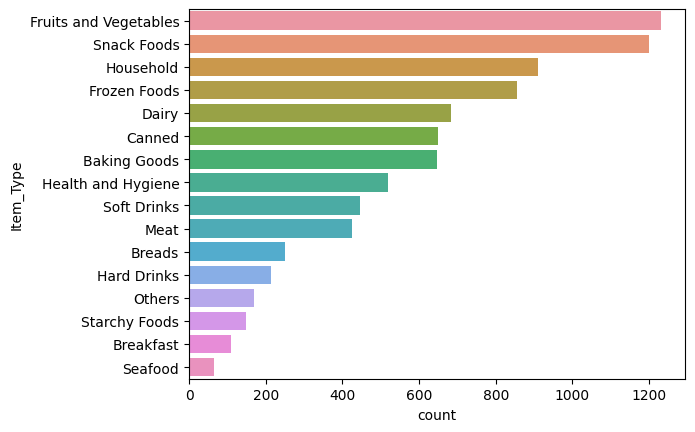

In [29]:
# Distribution of Item_Type Ordered by Counts Descending
order = df_sales_predictions['Item_Type'].value_counts().index
sns.countplot(data=df_sales_predictions, y='Item_Type', order=order);

A Countplot allows us to view the distribution of values for a Categorical Feature. For Item_Type, it seems that 'Fruits and Vegetables' and 'Snack Foods' have the most datapoints, while Seafood has the least.

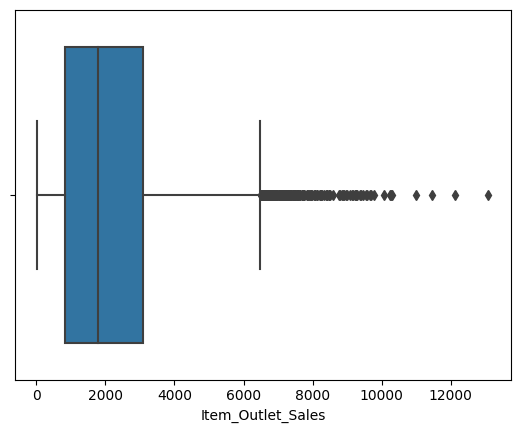

In [30]:
sns.boxplot(data=df_sales_predictions, x='Item_Outlet_Sales');

A Boxplot gives us a good view of the datarange and any outliers of a feature. Item_Outlet_Sales was chosen due to the checks we did on min, max and mean, as well as the .describe() we did. We can see that it has a mean of little over 2 000, with the 75th percentile sitting at little over 3 000, yet it has a max of over 13 000. This indicated that there may be significant outliers.

The graph above proves this point. There are a number of outliers under 10 000, and a few over it. We can see that the mean for the rest of the data is sitting at a little under 2000 as well.

In [31]:
# Heatmap to check for correlations
corr = df_sales_predictions.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


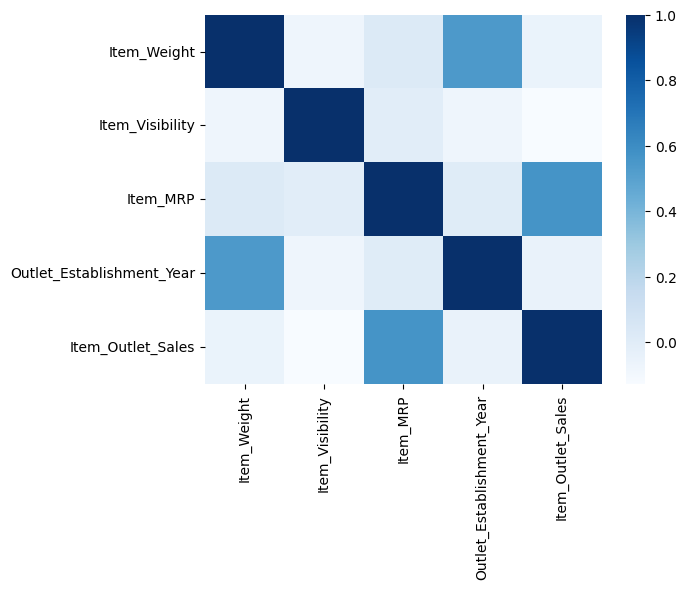

In [32]:
sns.heatmap(data=corr, cmap='Blues');

The heatmap is ideal for checking correlations between numerical features. It seems that there are two pairs with relatively strong correlations, those being Outlet_Establishment_Year and Item_Weight, and Item_Outlet_Sales and Item_MRP.

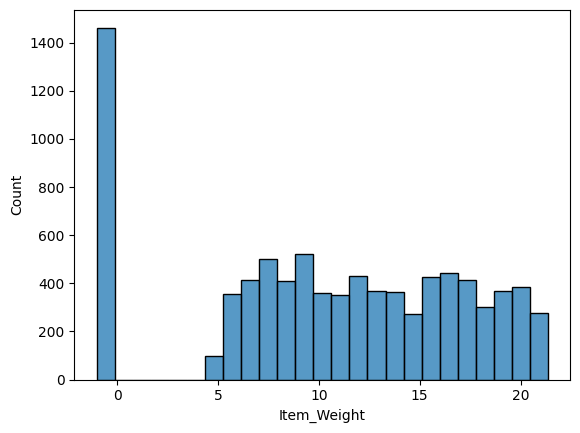

In [33]:
sns.histplot(data=df_sales_predictions, x='Item_Weight');

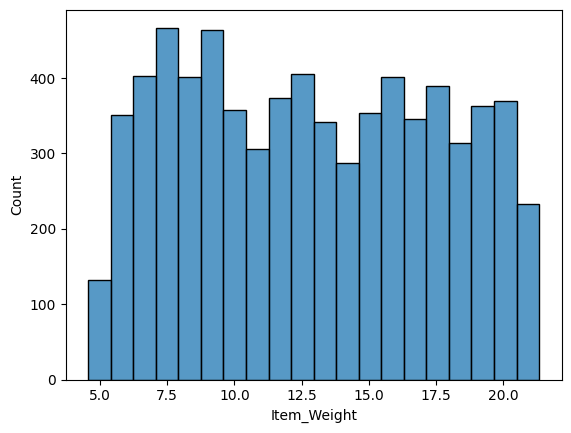

In [34]:
sns.histplot(data=df_sales_predictions[~filter_Placeholders], x='Item_Weight');

The histogram is used to view the numerical features, in this case Item_Weight. We can see that it's relatively evenly spread out with the one exception of weights around 5 having significantly fewer values.

We can also see a lot of values below 0. This is due to the imputation of the -1 placeholder for all missing values. The first graph gives us an overview of all the data including the placeholders, whereas the second graph excludes the placeholders

## Feature Inspection

### Replace Placeholders for Part 4

Remove placeholders as per requirements in Project 1 - Part 4

Placeholders are on 'Outlet_Size' ('MISSING') and 'Item_Weight' (-1)

In [35]:
# Double check that we get 2410 again
df_sales_predictions['Outlet_Size'].replace('MISSING', np.nan).isna().sum()

2410

In [36]:
# Make the change permanent
df_sales_predictions['Outlet_Size'].replace('MISSING', np.nan, inplace=True)

In [37]:
df_sales_predictions['Outlet_Size'].isna().sum()

2410

In [38]:
# Double check that we get 1463 again
df_sales_predictions['Item_Weight'].replace(-1, np.nan).isna().sum()

1463

In [39]:
# Make the change permanent
df_sales_predictions['Item_Weight'].replace(-1, np.nan, inplace=True)

In [40]:
df_sales_predictions['Item_Weight'].isna().sum()

1463

### Create User Defined Functions for Inspections

In [41]:
def InspectFeature(feature, df=df_sales_predictions, printPlots=True,
                   target='Item_Outlet_Sales', fillna=False,
                   placeholder = 'MISSING', figsize = (6,4),
                   order=None, **kwargs):
  '''
  Create InspectFeature function to help with inspecting each feature
  Parameters:
    feature -> The dataframe column to inspect
    df -> The dataframe to be used
    printPlots -> True to print plots(default), False to only print stats(quicker runtime and takes less space).
    fillna -> True to fill null values with placeholder
    placeholder -> value to fill null values with if fill=True
    figsize -> Size of figs
    order -> Order to use in figs
    **Kwargs for regplot
  '''
  temp_df = df.copy()

  # Calculate stats before fillna
  dtype = temp_df[feature].dtype
  null_counts = temp_df[feature].isna().sum()

  # Fillna if True
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
    null_counts_after_fillna = temp_df[feature].isna().sum()

  # Calculate stats after fillna
  unique_counts = temp_df[feature].nunique()
  total_size = len(temp_df[feature])
  value_counts = temp_df[feature].value_counts()

  # Print Stats
  print(f'Inspecting feature {feature}')
  print(f'Data Type: {dtype}')
  print(f'Total Size: {total_size}')
  print(f'Unique Values: {unique_counts} ({unique_counts/total_size * 100:,.2f}%)')
  if fillna == True:
    print(f'Null Values before fillna: {null_counts} ({null_counts/total_size * 100:,.2f}%)')
    print(f'Null Values after fillna: {null_counts_after_fillna} ({null_counts_after_fillna/total_size * 100:,.2f}%)')
  else:
    print(f'Null Values: {null_counts} ({null_counts/total_size * 100:,.2f}%)')


  # Print Plots
  if printPlots == True:
    fig, ax = plt.subplots(figsize=figsize)
    # Histplot for numeric, countplot for categorical
    if dtype == 'float64' or dtype == 'int64':
      print(sns.histplot(data=temp_df, x=feature, ax=ax))
      print(plot_numeric_vs_target(df, feature, y=target, figsize=figsize, **kwargs));
    elif dtype == 'object':
      print(sns.countplot(data=temp_df, y=feature, ax=ax, order=order))
      print(plot_categorical_vs_target(df, feature,y=target, figsize=figsize, fillna=fillna, placeholder=placeholder, order=order));
    else:
      print("Unsure which plot to use for dtype, defaulting to histplot")
      print(sns.histplot(data=temp_df, x=feature, ax=ax))


The below code was copied from the Part-Time Data Science - Data Fundamentals [Umuzi] course - EDA Functions Part 2 and EDA Functions Part 3

In [42]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

Feature inspection:

*   What type of feature?

  `Categorical (Nominal)`

*   How many null values? What percentage?

  `<answer>`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `<answer>`

*   Is the feature constant or quasi-constant?

  `<answer>`

*   What is the cardinality? Is it high (>10)?

  `<answer>`

*   Would we know this feature before the target is determined?

  `<answer>`

*   Is there a business case/understanding reason to exclude based on our business case?

  `<answer>`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `<answer>`

*   Does this feature appear to be a predictor of the target?

  `<answer>`


### Inspect Item_Identifier

Inspecting feature Item_Identifier
Data Type: object
Total Size: 8523
Unique Values: 1559 (18.29%)
Null Values: 0 (0.00%)
Axes(0.125,0.11;0.775x0.77)
(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)


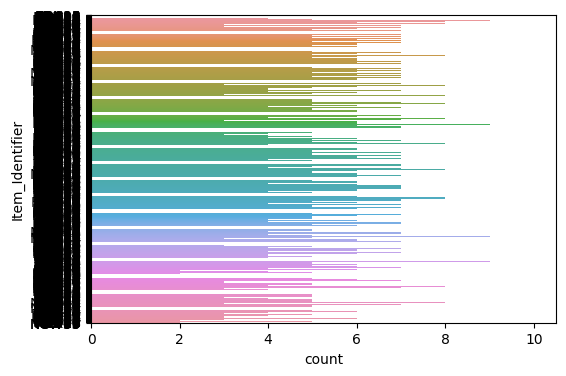

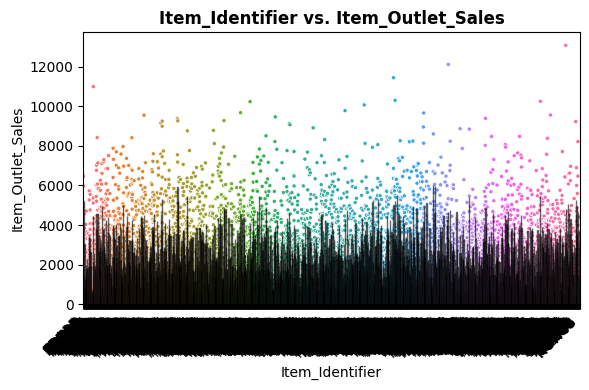

In [43]:
InspectFeature('Item_Identifier')

Feature inspection:

*   What type of feature?

  `Categorical (Nominal)`

*   How many null values? What percentage?

  `0 (0.00%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `N/A - No Null Values`

*   Is the feature constant or quasi-constant?

  `Neither, feature has many different values`

*   What is the cardinality? Is it high (>10)?

  `Yes, 1559`

*   Would we know this feature before the target is determined?

  `Yes`

*   Is there a business case/understanding reason to exclude based on our business case?

  `Yes, due to it being an identifier`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `No`

*   Does this feature appear to be a predictor of the target?

  `No`



### Inspect Item_Weight

Inspecting feature Item_Weight
Data Type: float64
Total Size: 8523
Unique Values: 415 (4.87%)
Null Values: 1463 (17.17%)
Axes(0.125,0.11;0.775x0.77)


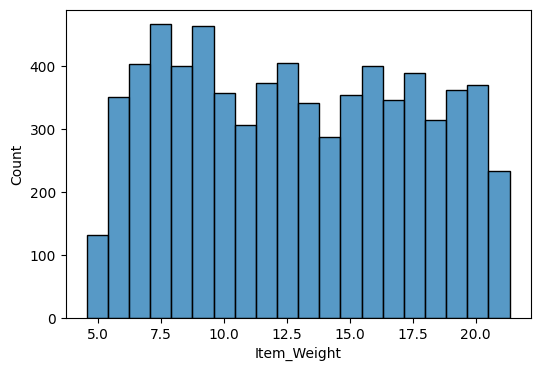

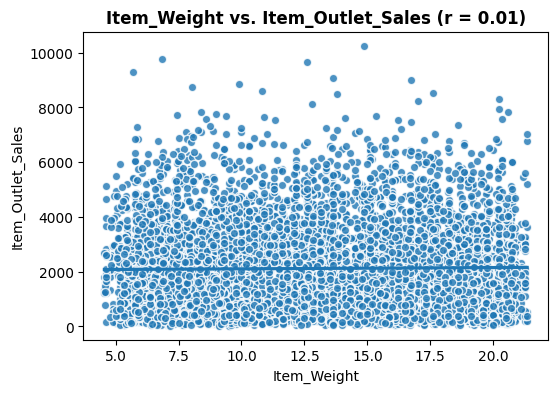

(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)


In [44]:
InspectFeature('Item_Weight')

Feature inspection:

*   What type of feature?

  `Numeric`

*   How many null values? What percentage?

  `1463 (17.17%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `Impute with mean`

*   Is the feature constant or quasi-constant?

  `Neither, many values`

*   What is the cardinality? Is it high (>10)?

  `Not Categorical`

*   Would we know this feature before the target is determined?

  `Yes`

*   Is there a business case/understanding reason to exclude based on our business case?

  `Possibly, people generally do not care about item weight when buying something, unless weight is a factor for the specific product`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `No`

*   Does this feature appear to be a predictor of the target?

  `No`


### Inspect Item_Fat_Content

Inspecting feature Item_Fat_Content
Data Type: object
Total Size: 8523
Unique Values: 2 (0.02%)
Null Values: 0 (0.00%)
Axes(0.125,0.11;0.775x0.77)
(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)


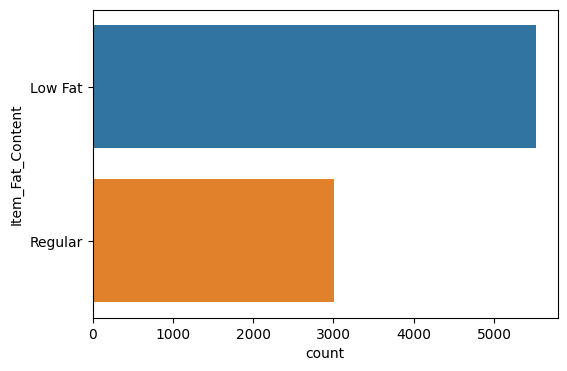

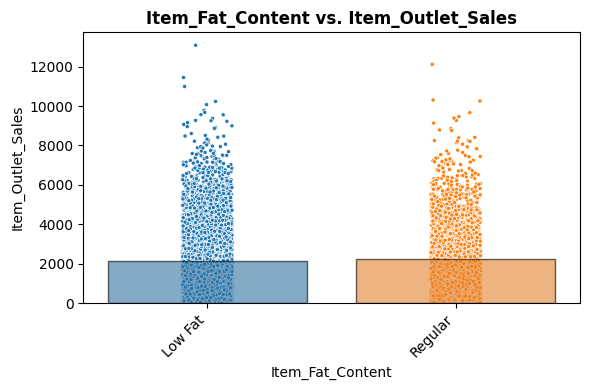

In [45]:
InspectFeature('Item_Fat_Content')

Feature inspection:

*   What type of feature?

  `Categorical (Ordinal)`

*   How many null values? What percentage?

  `0 (0.00%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `N/A - No Null Values`

*   Is the feature constant or quasi-constant?

  `Neither, relativelly even split between 2 values`

*   What is the cardinality? Is it high (>10)?

  `No, 2 Values`

*   Would we know this feature before the target is determined?

  `Yes`

*   Is there a business case/understanding reason to exclude based on our business case?

  `No`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `Potentially, different locations/people may prefer low-fat or regular`

*   Does this feature appear to be a predictor of the target?

  `Yes`


### Inspect Item_Visibility

Inspecting feature Item_Visibility
Data Type: float64
Total Size: 8523
Unique Values: 7880 (92.46%)
Null Values: 0 (0.00%)
Axes(0.125,0.11;0.775x0.77)


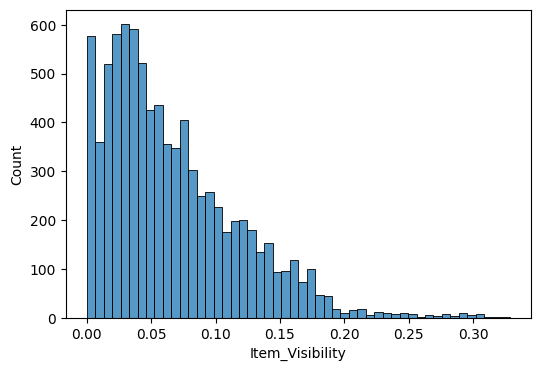

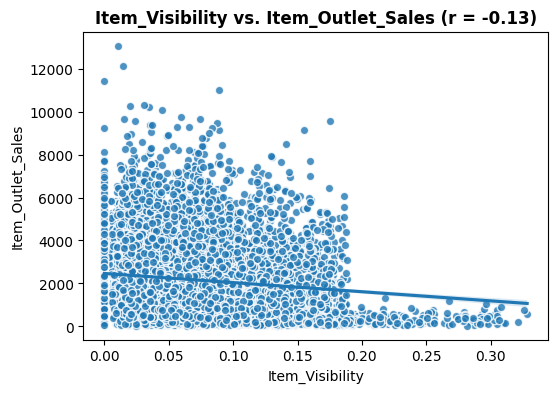

(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)


In [46]:
InspectFeature('Item_Visibility')

Feature inspection:

*   What type of feature?

  `Numerical`

*   How many null values? What percentage?

  `0 (0.00%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `N/A - No Null Values`

*   Is the feature constant or quasi-constant?

  `Neither, 7880 (92%) unique values`

*   What is the cardinality? Is it high (>10)?

  `Not Categorical`

*   Would we know this feature before the target is determined?

  `Depending on when the data is taken, if data is taken before the store is set up, then no, if the data is taken after the store is set up, then yes. In this case, we can assume yes.`

*   Is there a business case/understanding reason to exclude based on our business case?

  `No`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `Potentially, if there's more of the item visible, people are less likely to miss it, but probably not a big case.`

*   Does this feature appear to be a predictor of the target?

  `No`


### Inspect Item_Type

Inspecting feature Item_Type
Data Type: object
Total Size: 8523
Unique Values: 16 (0.19%)
Null Values: 0 (0.00%)
Axes(0.125,0.11;0.775x0.77)
(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)


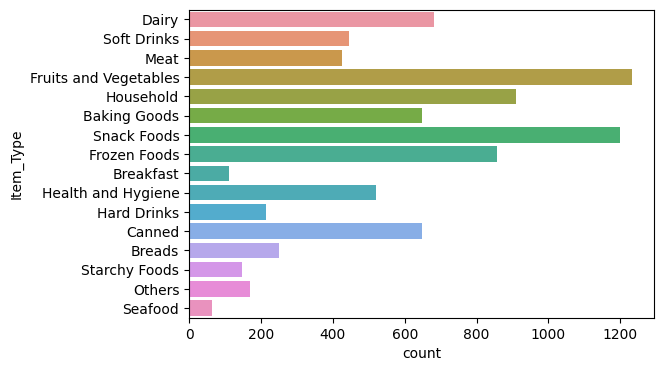

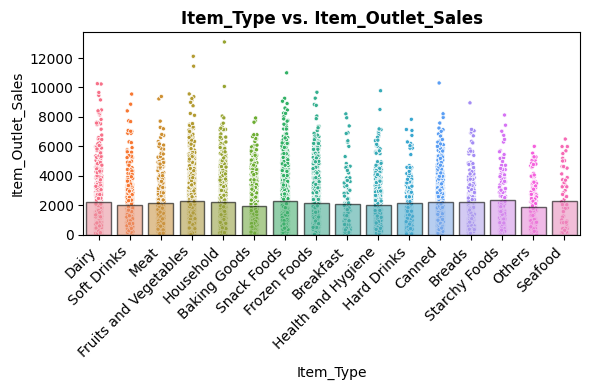

In [47]:
InspectFeature('Item_Type')

Feature inspection:

*   What type of feature?

  `Categorical (Nominal)`

*   How many null values? What percentage?

  `0 (0.00%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `N/A - No Null Values`

*   Is the feature constant or quasi-constant?

  `No, the data is split amongst the types`

*   What is the cardinality? Is it high (>10)?

  `Yes, 16 unique values`

*   Would we know this feature before the target is determined?

  `Yes`

*   Is there a business case/understanding reason to exclude based on our business case?

  `No`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `Yes`

*   Does this feature appear to be a predictor of the target?

  `Yes`


### Inspect Item_MRP

Inspecting feature Item_MRP
Data Type: float64
Total Size: 8523
Unique Values: 5938 (69.67%)
Null Values: 0 (0.00%)
Axes(0.125,0.11;0.775x0.77)


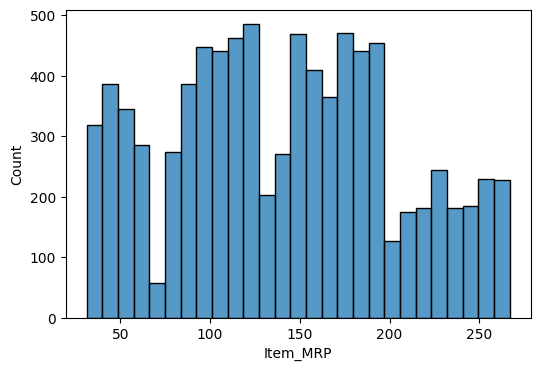

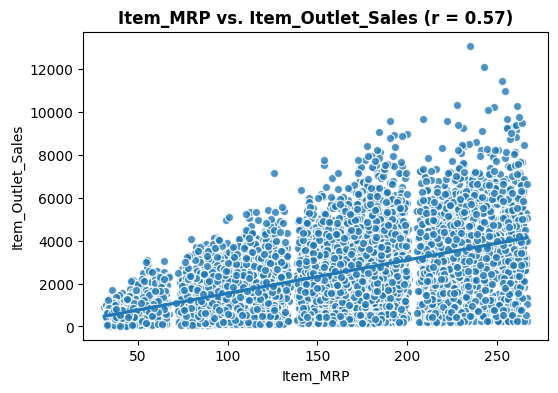

(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)


In [48]:
InspectFeature('Item_MRP')

Feature inspection:

*   What type of feature?

  `Numeric`

*   How many null values? What percentage?

  `0 (0.00%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `N/A - No Null Values`

*   Is the feature constant or quasi-constant?

  `No`

*   What is the cardinality? Is it high (>10)?

  `Not Categorical`

*   Would we know this feature before the target is determined?

  `Yes`

*   Is there a business case/understanding reason to exclude based on our business case?

  `No`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `Yes`

*   Does this feature appear to be a predictor of the target?

  `Yes`


### Inspect Outlet_Identifier

Inspecting feature Outlet_Identifier
Data Type: object
Total Size: 8523
Unique Values: 10 (0.12%)
Null Values: 0 (0.00%)
Axes(0.125,0.11;0.775x0.77)
(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)


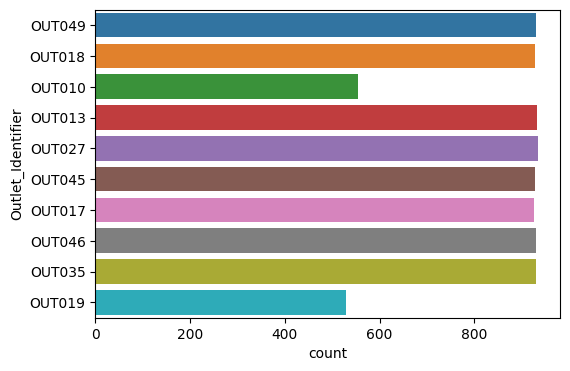

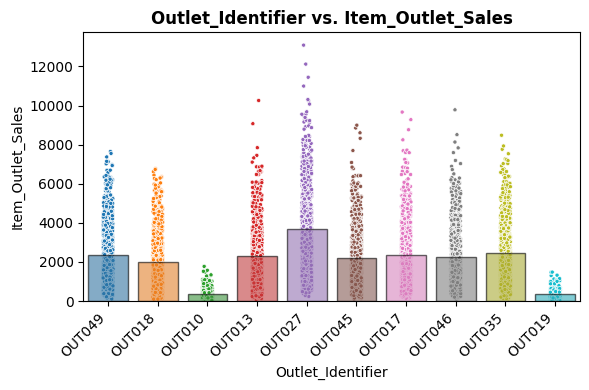

In [49]:
InspectFeature('Outlet_Identifier')

Feature inspection:

*   What type of feature?

  `Categorical (Nominal)`

*   How many null values? What percentage?

  `0 (0.00%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `N/A - No Null Values`

*   Is the feature constant or quasi-constant?

  `No`

*   What is the cardinality? Is it high (>10)?

  `No, 10`

*   Would we know this feature before the target is determined?

  `No`

*   Is there a business case/understanding reason to exclude based on our business case?

  `No`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `Yes`

*   Does this feature appear to be a predictor of the target?

  `Yes`


### Inspect Outlet_Establishment_Year

Inspecting feature Outlet_Establishment_Year
Data Type: int64
Total Size: 8523
Unique Values: 9 (0.11%)
Null Values: 0 (0.00%)
Axes(0.125,0.11;0.775x0.77)


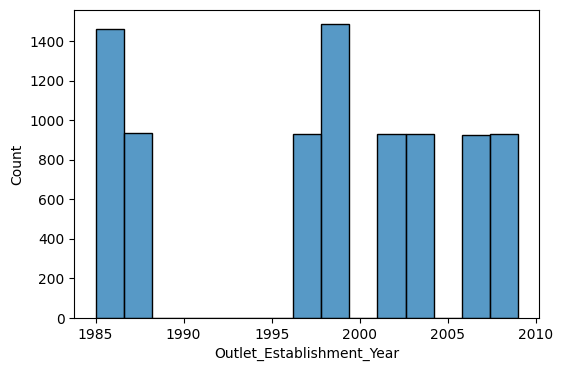

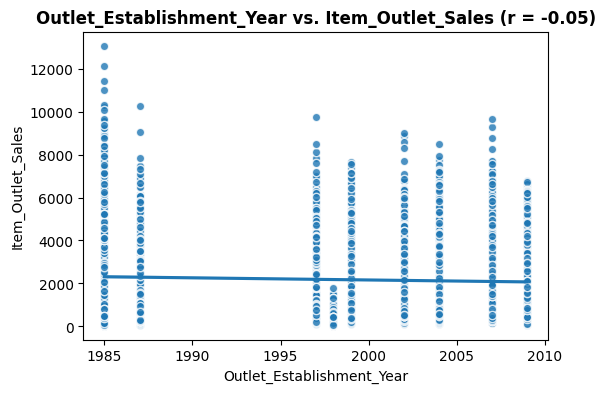

(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)


In [50]:
InspectFeature('Outlet_Establishment_Year')

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

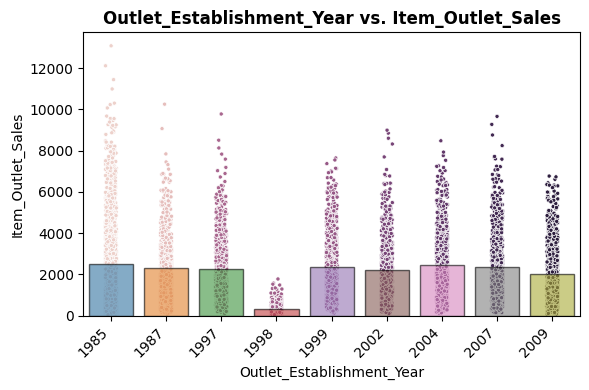

In [53]:
plot_categorical_vs_target(df_sales_predictions, 'Outlet_Establishment_Year',y='Item_Outlet_Sales')

Feature inspection:

*   What type of feature?

  `Categorical (Ordinal)`

*   How many null values? What percentage?

  `0 (0.00%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `N/A - No Null Values`

*   Is the feature constant or quasi-constant?

  `Neither, values spread accross the values`

*   What is the cardinality? Is it high (>10)?

  `No, 9`

*   Would we know this feature before the target is determined?

  `Yes`

*   Is there a business case/understanding reason to exclude based on our business case?

  `No`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `Potentially, if the store has been up and running for a long time, it may be more popular/well known, but probably not a large factor`

*   Does this feature appear to be a predictor of the target?

  `Yes`


### Inspect Outlet_Size

Inspecting feature Outlet_Size
Data Type: object
Total Size: 8523
Unique Values: 3 (0.04%)
Null Values: 2410 (28.28%)
Axes(0.125,0.11;0.775x0.77)
(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)


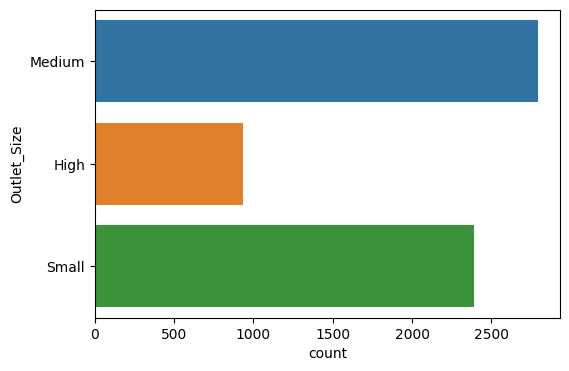

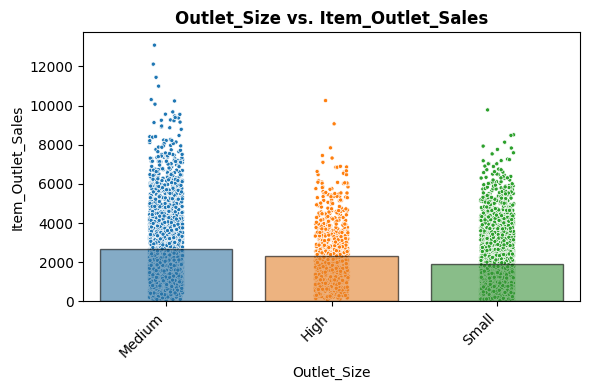

In [54]:
InspectFeature('Outlet_Size')

Feature inspection:

*   What type of feature?

  `Categorical (Ordinal)`

*   How many null values? What percentage?

  `2410 (28.28%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `Since it is such a significant portion that is missing, but we can try to impute 'MISSING' so that we don't lose the rest of the data, and then see how the model performs. If it performs poorly, then we can try to drop the rows.`

*   Is the feature constant or quasi-constant?

  `Neither, values split across the types`

*   What is the cardinality? Is it high (>10)?

  `No, 3 Unique Values`

*   Would we know this feature before the target is determined?

  `Yes`

*   Is there a business case/understanding reason to exclude based on our business case?

  `No`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `Yes`

*   Does this feature appear to be a predictor of the target?

  `Yes`


### Inspect Outlet_location_Type

Inspecting feature Outlet_Location_Type
Data Type: object
Total Size: 8523
Unique Values: 3 (0.04%)
Null Values: 0 (0.00%)
Axes(0.125,0.11;0.775x0.77)
(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)


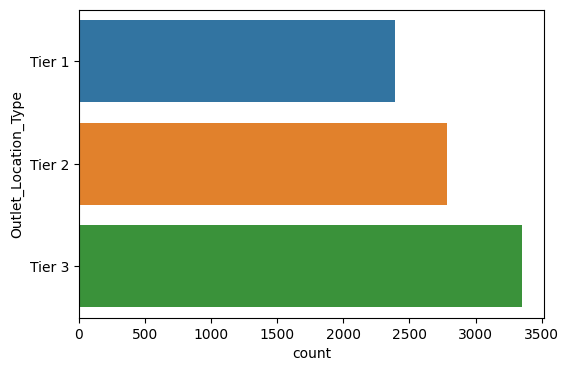

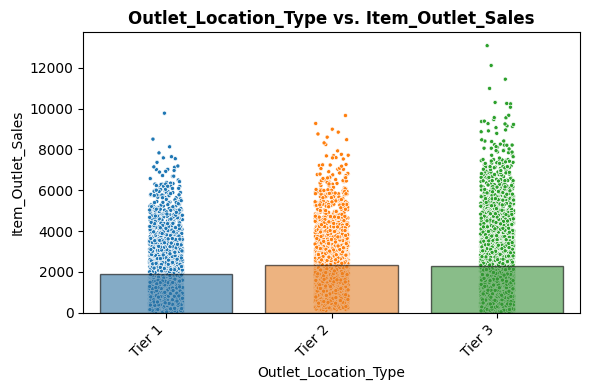

In [57]:
InspectFeature('Outlet_Location_Type', order=['Tier 1', 'Tier 2', 'Tier 3'])

Feature inspection:

*   What type of feature?

  `Categorical (Ordinal)`

*   How many null values? What percentage?

  `0 (0.00%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `N/A - No Null Values`

*   Is the feature constant or quasi-constant?

  `No, values spread accross the types`

*   What is the cardinality? Is it high (>10)?

  `No, 3 unique values`

*   Would we know this feature before the target is determined?

  `Yes`

*   Is there a business case/understanding reason to exclude based on our business case?

  `No`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `Yes`

*   Does this feature appear to be a predictor of the target?

  `Yes`


### Inspect Outlet_Type

Inspecting feature Outlet_Type
Data Type: object
Total Size: 8523
Unique Values: 4 (0.05%)
Null Values: 0 (0.00%)
Axes(0.125,0.11;0.775x0.77)
(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)


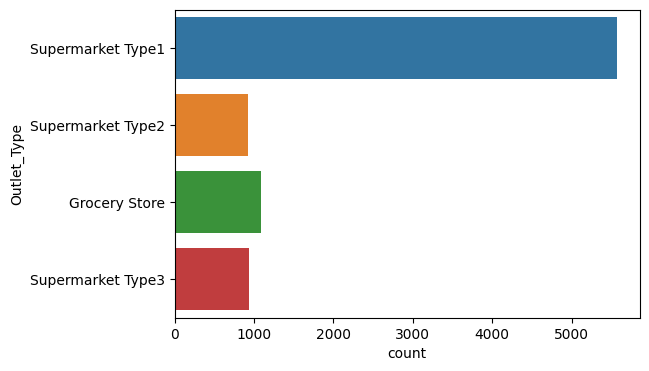

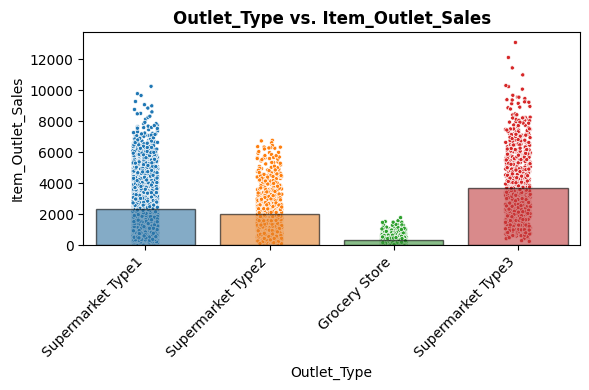

In [56]:
InspectFeature('Outlet_Type')

Feature inspection:

*   What type of feature?

  `Categorical (Nominal)`

*   How many null values? What percentage?

  `0 (0.00%)`

*   What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  `N/A - No Null Values`

*   Is the feature constant or quasi-constant?

  `Closer to Quasi-Constant, most values fall under Supermarket Type1, but not really enough to call it Quasi-Constant.`

*   What is the cardinality? Is it high (>10)?

  `No, 4 unique values`

*   Would we know this feature before the target is determined?

  `Yes`

*   Is there a business case/understanding reason to exclude based on our business case?

  `No`

*   Based on your business understanding, would you expect this feature to be a predictor of the target?

  `Yes`

*   Does this feature appear to be a predictor of the target?

  `Yes`


# Preprocessing (Project 1 - Part 5)


Reload the data to prevent data leakage

In [122]:
df_sales_preprocessing = pd.read_csv(initial_data_filepath)

In [123]:
df_sales_preprocessing.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [124]:
# Check Unique Values %
unique_counts = df_sales_preprocessing.nunique()
unique_counts / len(df_sales_preprocessing) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [125]:
# Check Duplicates
df_sales_preprocessing.duplicated().sum()

0

In [126]:
# Check Missing Values - To be fixed with Imputer later on
df_sales_preprocessing.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Check for Categorical Inconsistencies

In [127]:
categorical_columns = df_sales_preprocessing.select_dtypes('object').columns
df_sales_preprocessing[categorical_columns]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [128]:
# Check every categorical column for potential inconsistent data
for catcol in categorical_columns:
  print(f'*** {catcol} ***')
  print(df_sales_predictions[catcol].value_counts(),'\n')

*** Item_Identifier ***
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

*** Item_Fat_Content ***
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 

*** Item_Type ***
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

*** Outlet_Identifier ***
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528


In [129]:
df_sales_preprocessing['Outlet_Size'].replace('High', 'Large', inplace=True)

In [130]:
df_sales_preprocessing['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

Requirements:

* Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

* Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

* Perform a train test split

* Create a preprocessing object to prepare the dataset for Machine Learning
Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

## Train/Test Split

In [131]:
df_sales_preprocessing.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [132]:
# Define the Target
y = df_sales_preprocessing['Item_Outlet_Sales']

# Define the Features
X = df_sales_preprocessing.drop(columns=['Item_Identifier', 'Item_Weight', 'Item_Visibility'])

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4776,Low Fat,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2,515.3292
7510,Regular,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2,3056.0220
5828,Regular,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1,1577.9460
5327,Low Fat,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1,1331.6000
4810,Low Fat,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1,1687.1372


## Column Transformer

### Numeric

In [133]:
# Numeric Columns List
num_cols = X_train.select_dtypes('number').columns

# Impute Strategy Mean
impute_num = SimpleImputer(strategy='mean')

# Scaler
scaler_num = StandardScaler()

# Pipeline
num_pipe = make_pipeline(impute_num, scaler_num)

# Tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

# Display Pipeline
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [134]:
# Fit the pipelin
num_pipe.fit(X_train[num_cols])

# Transform Training Data
X_train_num_tf = num_pipe.transform(X_train[num_cols])

# Transform Testing Data
X_test_num_tf = num_pipe.transform(X_test[num_cols])

In [135]:
X_train_num_tf.head()

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
4776,1.828109,1.327849,-0.985086
7510,0.603369,1.327849,0.491798
5828,0.244541,0.136187,-0.367396
5327,-0.952591,0.732018,-0.510595
4810,-0.336460,0.493686,-0.303924


In [136]:
# Check Scaling - mean ~0 and std ~1
X_train_num_tf.describe().round(2)

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.77,-1.53,-1.27
25%,-0.76,-1.29,-0.79
50%,0.03,0.14,-0.23
75%,0.72,0.73,0.54
max,1.99,1.33,6.32


In [165]:
# Check null values
X_train_num_tf.isna().sum().sum()

0

### Ordinal

In [153]:
# Ordinal Columns List
ord_cols = ['Outlet_Size','Outlet_Establishment_Year','Outlet_Location_Type']

# Impute Strategy Mean
impute_ord = SimpleImputer(strategy='constant', fill_value='MISSING')

# Scaler
scaler_ord = StandardScaler()

# Encoder
size_order = ['MISSING', 'Small', 'Medium', 'Large']
year_order = df_sales_preprocessing['Outlet_Establishment_Year'].value_counts().index
location_order = ['Tier 1', 'Tier 2', 'Tier 3']
ord_enc = OrdinalEncoder(categories=[size_order, year_order, location_order])

# Pipeline
ord_pipe = make_pipeline(impute_ord, ord_enc, scaler_ord)

# Tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)

# Display Pipeline
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['MISSING', 'Small', 'Medium',
                                             'Large'],
                                            Int64Index([1985, 1987, 1999, 1997, 2004, 2002, 2009, 2007, 1998], dtype='int64'),
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [154]:
# Fit the pipelin
ord_pipe.fit(X_train[ord_cols])

# Transform Training Data
X_train_ord_tf = ord_pipe.transform(X_train[ord_cols])

# Transform Testing Data
X_test_ord_tf = ord_pipe.transform(X_test[ord_cols])

In [155]:
X_train_ord_tf.head()

,Outlet_Size,Outlet_Establishment_Year,Outlet_Location_Type
4776,0.748125,0.936919,1.084948
7510,0.748125,0.936919,1.084948
5828,0.748125,-0.612072,-1.384777
5327,-0.264370,0.162423,-0.149914
4810,-1.276865,0.549671,-0.149914


In [156]:
# Check Scaling - mean ~0 and std ~1
X_train_ord_tf.describe().round(2)

,Outlet_Size,Outlet_Establishment_Year,Outlet_Location_Type
count,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.28,-1.39,-1.38
25%,-1.28,-1.00,-1.38
50%,-0.26,0.16,-0.15
75%,0.75,0.94,1.08
max,1.76,1.71,1.08


In [164]:
# Check null values
X_train_ord_tf.isna().sum().sum()

0

### Nominal

In [141]:
# Nominal Columns List
nom_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']

# Impute Strategy Mean
impute_nom = SimpleImputer(strategy='constant', fill_value='MISSING')

# Encoder
ohe_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Pipeline
nom_pipe = make_pipeline(impute_nom, ohe_enc)

# Tuple for ColumnTransformer
nom_tuple = ('nominal', nom_pipe, nom_cols)

# Display Pipeline
nom_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [142]:
# Fit the pipelin
nom_pipe.fit(X_train[nom_cols])

# Transform Training Data
X_train_nom_tf = nom_pipe.transform(X_train[nom_cols])

# Transform Testing Data
X_test_nom_tf = nom_pipe.transform(X_test[nom_cols])

In [143]:
X_train_nom_tf.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5327,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [166]:
# Check null values
X_train_nom_tf.isna().sum().sum()

0

## Combine the data back together

In [160]:
X_train_combined = pd.concat([X_train_num_tf, X_train_ord_tf, X_train_nom_tf],
                             axis=1)
X_train_combined.info()
X_train_combined.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_MRP                         6392 non-null   float64
 1   Outlet_Establishment_Year        6392 non-null   float64
 2   Item_Outlet_Sales                6392 non-null   float64
 3   Outlet_Size                      6392 non-null   float64
 4   Outlet_Establishment_Year        6392 non-null   float64
 5   Outlet_Location_Type             6392 non-null   float64
 6   Item_Fat_Content_LF              6392 non-null   float64
 7   Item_Fat_Content_Low Fat         6392 non-null   float64
 8   Item_Fat_Content_Regular         6392 non-null   float64
 9   Item_Fat_Content_low fat         6392 non-null   float64
 10  Item_Fat_Content_reg             6392 non-null   float64
 11  Outlet_Establishment_Year_1985   6392 non-null   float64
 12  Outlet_Establishm

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size,Outlet_Establishment_Year,Outlet_Location_Type,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,1.828109,1.327849,-0.985086,0.748125,0.936919,1.084948,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,0.603369,1.327849,0.491798,0.748125,0.936919,1.084948,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,0.244541,0.136187,-0.367396,0.748125,-0.612072,-1.384777,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5327,-0.952591,0.732018,-0.510595,-0.264370,0.162423,-0.149914,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,-0.336460,0.493686,-0.303924,-1.276865,0.549671,-0.149914,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
